In [1]:
from pylab import *

In [2]:
N = 1000
H = zeros((N,N))

x = linspace(0.0,1.0,N)
dx = x[1]-x[0]

a = 1.0 #(a = hbar^2/(2ma^2))

#ZERO POTENTIAL (0 BC -> inf square well)
V = zeros(N) #zero


for i in range(0,N):
    if (i<N-1):
        H[i,i+1] = -a
    
    if (i>0):
        H[i,i-1] = -a
        
    H[i,i] = 2*a + V[i]
    

In [3]:
w,v = eigh(H)

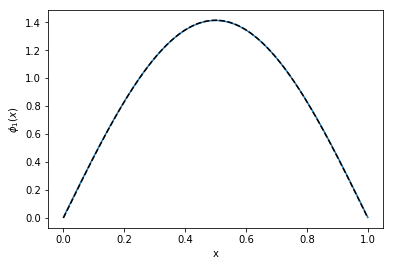

In [4]:
plot(x,-v[:,0]/sqrt(dx))
plot(x,sqrt(2.0)*sin(pi*x/1.0),'k--')
xlabel('x')
ylabel('$\phi_{1}(x)$')
show()

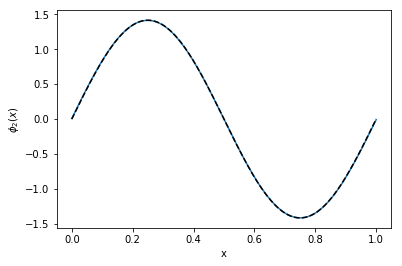

In [5]:
plot(x,-v[:,1]/sqrt(dx))
plot(x,sqrt(2.0)*sin(2.0*pi*x/1.0),'k--')
xlabel('x')
ylabel('$\phi_{2}(x)$')
show()

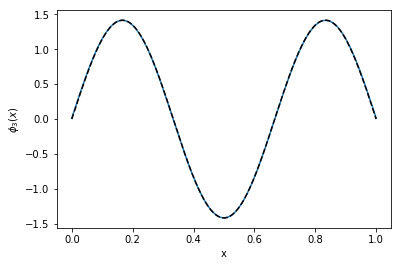

In [6]:
plot(x,-v[:,2]/sqrt(dx))
plot(x,sqrt(2.0)*sin(3.0*pi*x/1.0),'k--')
xlabel('x')
ylabel('$\phi_{3}(x)$')
show()

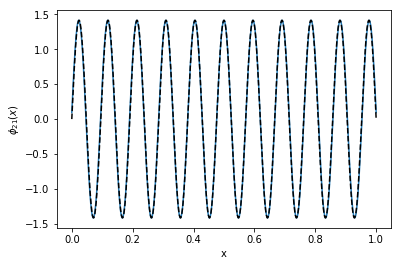

In [7]:
plot(x,v[:,20]/sqrt(dx))
plot(x,sqrt(2.0)*sin(21.0*pi*x/1.0),'k--')
xlabel('x')
ylabel('$\phi_{21}(x)$')
show()

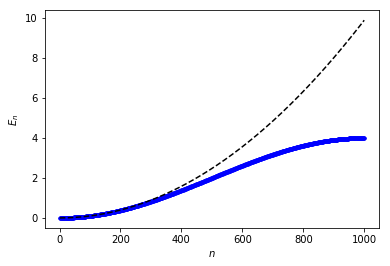

In [8]:
xn = linspace(1,N,N)
plot(xn,w,'b.',label='x1')
plot(xn,(pi*a*dx*xn)**2,'k--',label='x2')
xlabel('$n$')
ylabel('$E_{n}$')
show()

Note that things break down around $N\sim 300$. This can also be seen with a log-log plot:

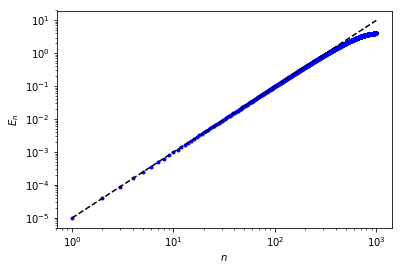

In [30]:
loglog(xn,w,'b.')
loglog(xn,(pi*dx*xn)**2,'k--')
xlabel('$n$')
ylabel('$E_{n}$')
show()

3(a) - For the action integral,

$$\frac{1}{\pi}\int_{-A}^{A}\sqrt{2m(E-V(x))}dx = \frac{\sqrt{2m}}{\pi}\int_{-A}^{A}\sqrt{E-\frac{1}{2}m\omega^{2}x^{2}}dx$$

$$\frac{1}{\pi}\int_{-A}^{A}\sqrt{2m(E-V(x))}dx  = \frac{1}{\pi}\sqrt{2mE}\int_{-\sqrt{\frac{2E}{m\omega^{2}}}}^{\sqrt{\frac{2E}{m\omega^{2}}}}\sqrt{1-\frac{x^{2}}{A^{2}}}dx$$

Here we let $x = A\sin\theta$ so $dx = A\cos\theta d\theta$, and

$$\frac{1}{\pi}\int_{-A}^{A}\sqrt{2m(E-V(x))}dx = \frac{A}{\pi}\sqrt{2mE}\int_{-\pi/2}^{\pi/2}\sqrt{1-\sin^{2}\theta}\cos\theta d\theta$$


$$\frac{1}{\pi}\int_{-A}^{A}\sqrt{2m(E-V(x))}dx = \frac{A}{\pi}\sqrt{2mE}\int_{-\pi/2}^{\pi/2}\left(\frac{1+\cos2\theta}{2}\right) d\theta = A\sqrt{\frac{m E}{2}}$$

Using $A = \sqrt{\frac{2E}{m\omega^{2}}}$ gives

$$\frac{1}{\pi}\int_{-A}^{A}\sqrt{2m(E-V(x))}dx = E/\omega = n\hbar$$

Thus $E = n\hbar\omega$. This misses the ground state energy $\frac{1}{2}\hbar\omega$, but it's pretty close for large $n$.

3(b)

In [123]:
N = 1000
H = zeros((N,N))

x = linspace(0.0,1.0,N)
dx = x[1]-x[0]

m = 1.0
omega = 1.0
a = 1.0 #(a = hbar^2/(2ma^2))

#ZERO POTENTIAL (0 BC -> inf square well)
V = 0.5*m*(omega*(x-0.5))**2.0 #zero


for i in range(0,N):
    if (i<N-1):
        H[i,i+1] = -a
    
    if (i>0):
        H[i,i-1] = -a
        
    H[i,i] = 2*a + V[i]
    

In [124]:
w,v = eigh(H)

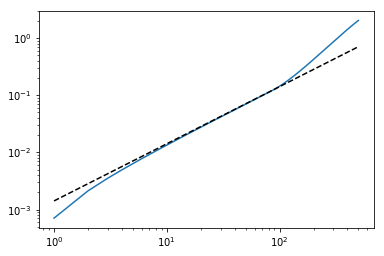

In [125]:
xn = linspace(1.0,N,N)
loglog(xn[0:500],w[0:500])
loglog(xn[0:500],sqrt(2*a)*omega*sqrt(m)*xn[0:500]*dx,'k--')
show()

Have to use $E_{n}\rightarrow \sqrt{2am}\omega n\delta x$

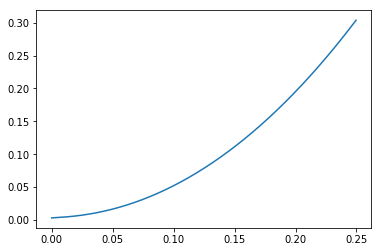

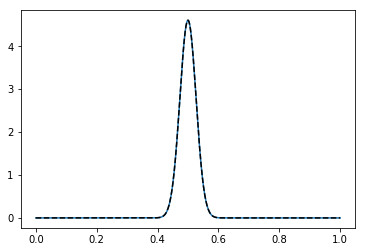

In [97]:
h = sqrt(2.0*a*m)*dx

plot(x,v[:,0]/sqrt(dx))
plot(x,((m*omega/(pi*h))**(0.25))*exp(-0.5*m*omega*((x-0.5)**2)/h),'k--')
show()

Linear potential

$E_{n} = (3\pi\hbar nmF)^{2/3}/(2m)$

In [98]:
N = 2000
H = zeros((N,N))

x = linspace(0.0,1.0,N)
dx = x[1]-x[0]

m = 1.0
F = 1.0
a = 1.0 #(a = hbar^2/(2ma^2))

#ZERO POTENTIAL (0 BC -> inf square well)
V = F*x #zero


for i in range(0,N):
    if (i<N-1):
        H[i,i+1] = -a
    
    if (i>0):
        H[i,i-1] = -a
        
    H[i,i] = 2*a + V[i]
    

In [99]:
w,v = eigh(H)

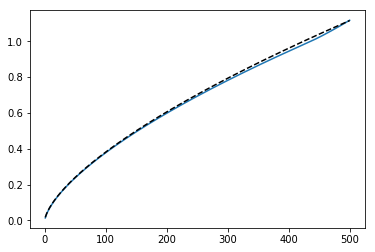

In [102]:
plot(xn[0:500],w[0:500])
plot(xn[0:500],((3*pi*h*m*F*xn[0:500])**(2.0/3.0))/(2.0*m),'k--')
show()

1D Hydrogen

$E_{n} = -\frac{m\alpha^{2}}{2\hbar^{2}n^{2}}$. Interestingly, the real case corresponds to $\alpha = \frac{e^{2}}{4\pi\epsilon_{0}}$. Using this gives the ACTUAL 3D energy values,

$$E_{n}\rightarrow -\frac{me^{4}}{32\pi^{2}\epsilon_{0}^{2}\hbar^{2}n^{2}}$$

In [120]:
N = 2000
H = zeros((N,N))

x = linspace(0.0,1.0,N)
dx = x[1]-x[0]

m = 1.0
alpha = 0.1
a = 1.0 #(a = hbar^2/(2ma^2))

#ZERO POTENTIAL (0 BC -> inf square well)
V = -alpha/(x+.0001) #zero


for i in range(0,N):
    if (i<N-1):
        H[i,i+1] = -a
    
    if (i>0):
        H[i,i-1] = -a
        
    H[i,i] = 2*a + V[i]
    

In [121]:
w,v = eigh(H)
h = sqrt(2.0*a*m)*dx

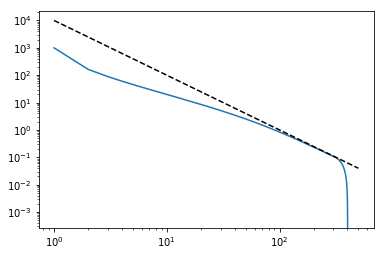

In [122]:
loglog(xn[0:500],-w[0:500])
loglog(xn[0:500],m*alpha*alpha/(2*h*h*(xn[0:500]**2)),'k--')
show()